DATASET WELL, consiste en la percepcion que tienen las personas de ansiedad

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install scikit-learn
!pip install xgboost
!pip install imbalanced-learn
!pip install lime
!pip install shap


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

file_path = "wgm_full_wave2_public_file_final.csv"  
df = pd.read_csv(file_path)

df = df.sample(n=5000,  random_state=42)

df

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\2761103468.py:7: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
1592,Egypt,121134758,0.498818,32372.303370,12/01/2020,2020,2,1,2,2,...,2,2,3,1,3,3,10,2,3,1
28991,China,158478237,0.529032,172781.736500,12/01/2020,2020,3,3,2,2,...,1,1,1,1,2,5,5,3,2,4
63619,Moldova,122655011,0.232661,527.101792,12/01/2020,2020,1,1,2,2,...,2,2,2,2,3,3,2,2,3,6
93042,Ivory Coast,197762798,0.410253,5941.911741,12/01/2020,2020,2,2,2,99,...,2,2,3,1,2,2,11,2,4,2
77942,Bulgaria,125195729,0.921408,5489.742617,12/01/2020,2020,2,1,3,1,...,3,4,4,2,3,2,2,3,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31617,India,118107348,0.872696,282785.038700,01/01/2021,2020,99,99,0,1,...,1,1,2,2,1,1,7,2,5,6
35290,Mexico,184210257,0.406573,37680.569240,01/01/2021,2020,4,1,3,2,...,2,2,3,2,3,3,8,3,3,2
58943,Taiwan,181244077,0.299346,6164.363949,10/01/2020,2020,2,2,2,2,...,3,3,4,2,2,5,5,4,2,1
87699,Estonia,178868855,1.213284,1324.359437,12/01/2020,2020,2,1,2,1,...,3,3,4,2,2,5,2,4,2,1


para que una variable sea considerada causa directa de ansiedad o depresión, debe estar respaldada por evidencia científica previa, cumplir criterios de temporalidad, asociación y plausibilidad, y ser coherente con modelos teóricos reconocidos. Las variables seleccionadas en este trabajo (edad, género, educación, ingreso, trabajo, percepción de ingreso, región) cumplen estas condiciones, mientras que otras como percepciones sobre ciencia representan actitudes culturales que podrían influir indirectamente, pero no constituyen factores causales directos


In [12]:
df_clean = df.copy()

# se deja un diccionario de las caracteristicas escogidas

def map_variables(df):

    gender_mapping = {1: 'Male', 2: 'Female'}
    education_mapping = {
        1: 'Primary_or_less', 
        2: 'Secondary', 
        3: 'Tertiary'
    }
    income_mapping = {
        1: 'Poorest_20%',
        2: 'Second_20%',
        3: 'Middle_20%',
        4: 'Fourth_20%',
        5: 'Richest_20%'
    }
    subjective_income_mapping = {
        1: 'Living_comfortably',
        2: 'Getting_by',
        3: 'Finding_difficult',
        4: 'Very_difficult',
        5: 'DK',
        6: 'Refused'
    }
    employment_mapping = {
        1: 'Full_time_employed_employer',
        2: 'Full_time_self_employed',
        3: 'Part_time_no_fulltime_needed',
        4: 'Unemployed',
        5: 'Part_time_wants_fulltime',
        6: 'Out_of_workforce'
    }
    mh7a_mapping = {1: 'Yes', 2: 'No', 99: 'DK/Refused'}

    # --- Aplicar mapeos ---
    df = df.copy()

    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].map(gender_mapping)
    if 'Education' in df.columns:
        df['Education'] = df['Education'].map(education_mapping)
    if 'Household_Income' in df.columns:
        df['Household_Income'] = df['Household_Income'].map(income_mapping)
    if 'Subjective_Income' in df.columns:
        df['Subjective_Income'] = df['Subjective_Income'].map(subjective_income_mapping)
    if 'EMP_2010' in df.columns:
        df['EMP_2010'] = df['EMP_2010'].map(employment_mapping)
    if 'MH7A' in df.columns:
        df['MH7A'] = df['MH7A'].map(mh7a_mapping)

    return df


df_clean = map_variables(df_clean)

exploramos un poco sobre las variables

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\2382978294.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\2382978294.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)
C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\2382978294.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=15)


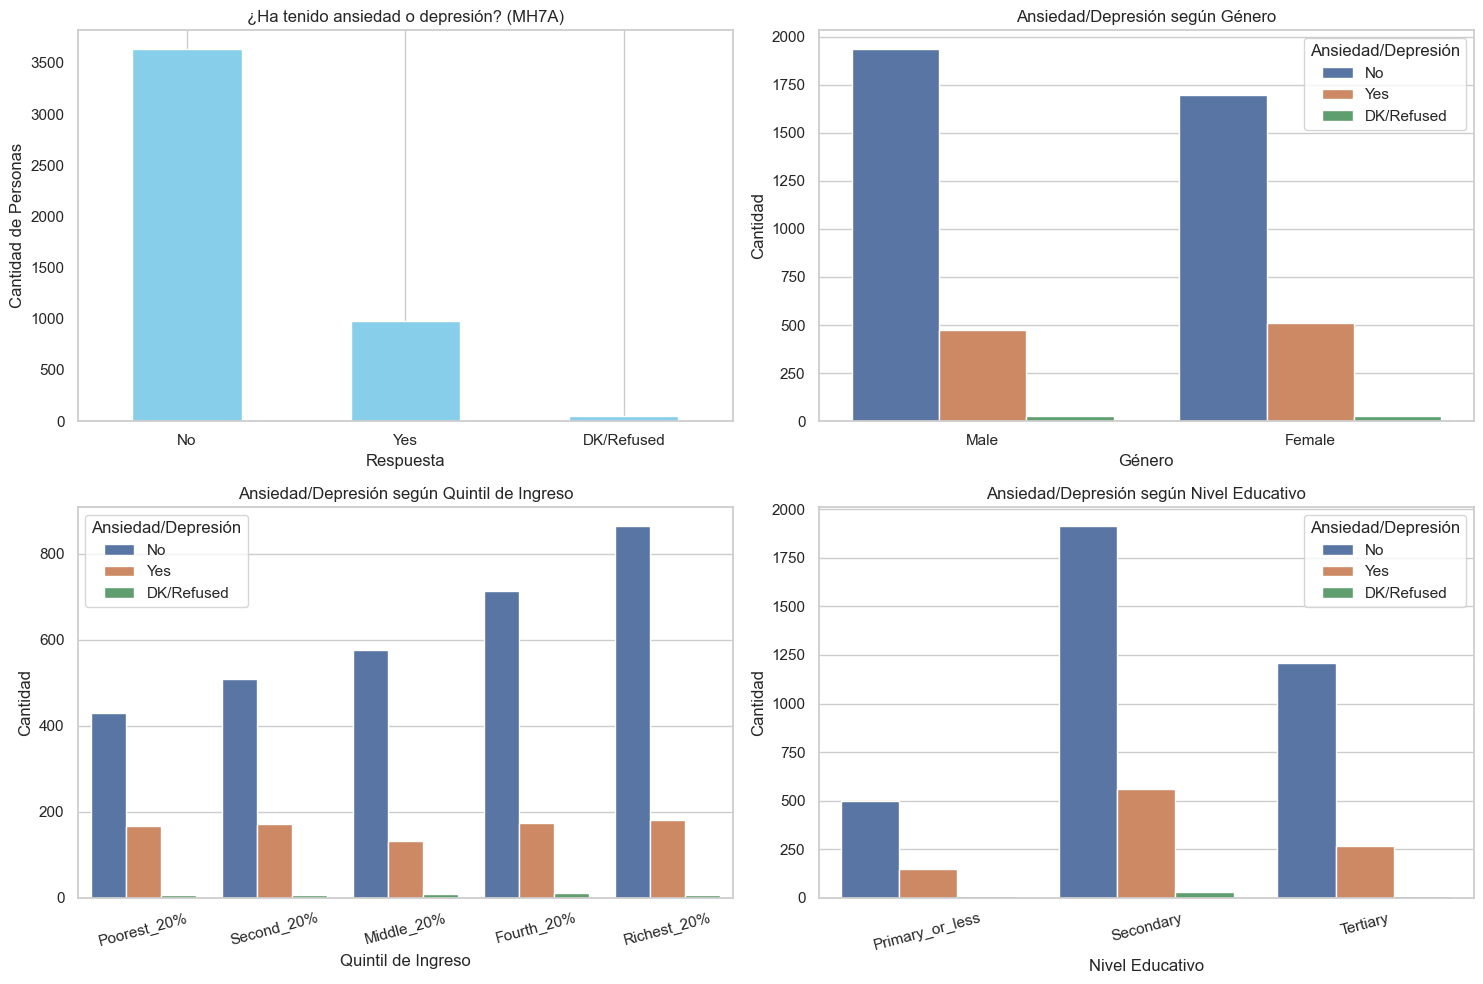

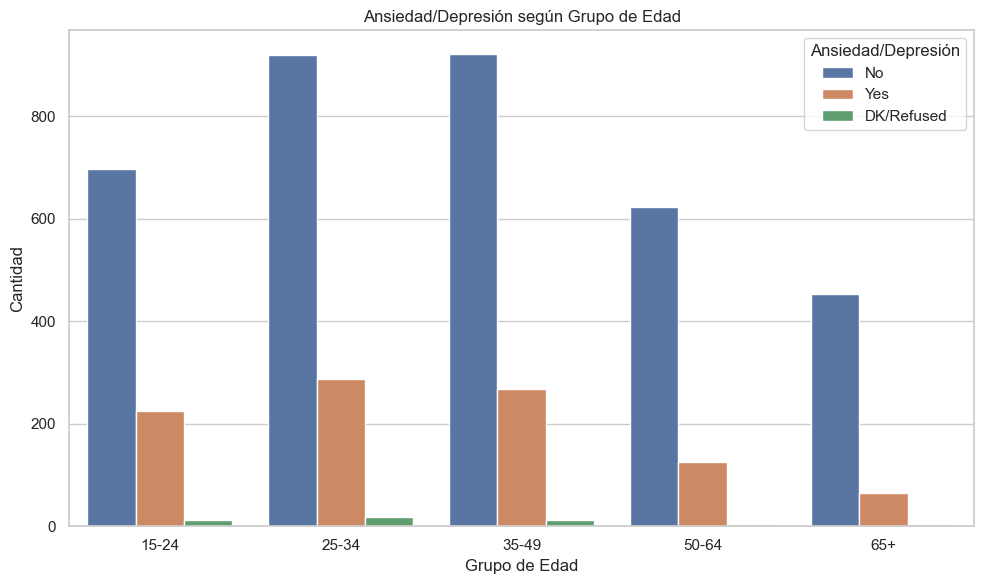

In [18]:
mh7a_counts = df_clean['MH7A'].value_counts()

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas x 2 columnas

mh7a_counts = df_clean['MH7A'].value_counts()
mh7a_counts.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("¿Ha tenido ansiedad o depresión? (MH7A)")
axes[0, 0].set_xlabel("Respuesta")
axes[0, 0].set_ylabel("Cantidad de Personas")
axes[0, 0].grid(axis='y')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

sns.countplot(data=df_clean, x='Gender', hue='MH7A', ax=axes[0, 1])
axes[0, 1].set_title("Ansiedad/Depresión según Género")
axes[0, 1].set_xlabel("Género")
axes[0, 1].set_ylabel("Cantidad")
axes[0, 1].legend(title='Ansiedad/Depresión')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

sns.countplot(
    data=df_clean,
    x='Household_Income',
    hue='MH7A',
    order=['Poorest_20%', 'Second_20%', 'Middle_20%', 'Fourth_20%', 'Richest_20%'],
    ax=axes[1, 0]
)
axes[1, 0].set_title("Ansiedad/Depresión según Quintil de Ingreso")
axes[1, 0].set_xlabel("Quintil de Ingreso")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title='Ansiedad/Depresión')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)

sns.countplot(
    data=df_clean,
    x='Education',
    hue='MH7A',
    order=['Primary_or_less', 'Secondary', 'Tertiary'],
    ax=axes[1, 1]
)
axes[1, 1].set_title("Ansiedad/Depresión según Nivel Educativo")
axes[1, 1].set_xlabel("Nivel Educativo")
axes[1, 1].set_ylabel("Cantidad")
axes[1, 1].legend(title='Ansiedad/Depresión')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=15)

plt.tight_layout()
plt.show()


bins = [15, 24, 34, 49, 64, 100]
labels = ['15-24', '25-34', '35-49', '50-64', '65+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Age_Group', hue='MH7A', order=labels)
plt.title("Ansiedad/Depresión según Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad")
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\56463391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_age_analysis, x='MH7A', y='Age', palette='pastel')


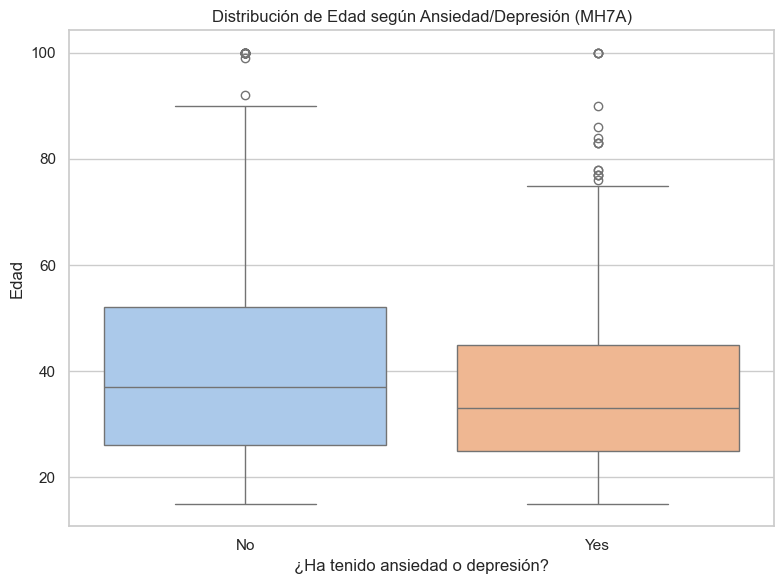

Media de Edad por Grupo:
MH7A
No     40.59626
Yes    36.70102
Name: Age, dtype: float64

Resultados del t-test de comparación de medias:
Estadístico t: -6.7656
Valor p: 1.8144e-11

✅ Hay diferencia estadísticamente significativa entre las edades de los dos grupos.


In [20]:
df_age_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_age_analysis, x='MH7A', y='Age', palette='pastel')
plt.title("Distribución de Edad según Ansiedad/Depresión (MH7A)")
plt.xlabel("¿Ha tenido ansiedad o depresión?")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()

mean_ages = df_age_analysis.groupby('MH7A')['Age'].mean()
print("Media de Edad por Grupo:")
print(mean_ages)

ages_yes = df_age_analysis[df_age_analysis['MH7A'] == 'Yes']['Age']
ages_no = df_age_analysis[df_age_analysis['MH7A'] == 'No']['Age']

t_stat, p_value = ttest_ind(ages_yes, ages_no, equal_var=False)

print("\nResultados del t-test de comparación de medias:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4e}")

if p_value < 0.05:
    print("\nHay diferencia estadísticamente significativa entre las edades de los dos grupos.")
else:
    print("\nNo se encontró diferencia significativa entre las edades de los dos grupos.")

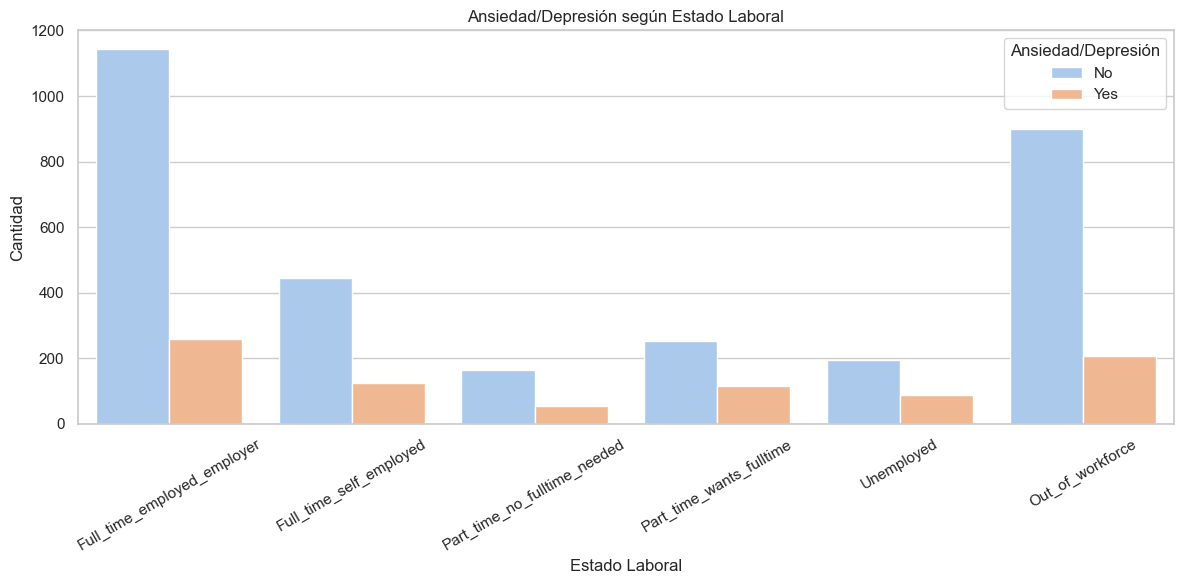


Resultados de la Prueba Chi-Cuadrado:
Estadístico Chi2: 51.4196
Valor p: 7.0952e-10
Grados de libertad: 5

Existe una asociación estadísticamente significativa entre el estado laboral y la presencia de ansiedad/depresión.


In [24]:
from scipy.stats import chi2_contingency


df_emp_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_emp_analysis,
    x='EMP_2010',
    hue='MH7A',
    order=[
        'Full_time_employed_employer',
        'Full_time_self_employed',
        'Part_time_no_fulltime_needed',
        'Part_time_wants_fulltime',
        'Unemployed',
        'Out_of_workforce'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Estado Laboral")
plt.xlabel("Estado Laboral")
plt.ylabel("Cantidad")
plt.xticks(rotation=30)
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

contingency_table = pd.crosstab(df_emp_analysis['EMP_2010'], df_emp_analysis['MH7A'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nResultados de la Prueba Chi-Cuadrado:")
print(f"Estadístico Chi2: {chi2:.4f}")
print(f"Valor p: {p_value:.4e}")
print(f"Grados de libertad: {dof}")

if p_value < 0.05:
    print("\nExiste una asociación estadísticamente significativa entre el estado laboral y la presencia de ansiedad/depresión.")
else:
    print("\nNo se encontró asociación estadísticamente significativa entre estado laboral y ansiedad/depresión.")

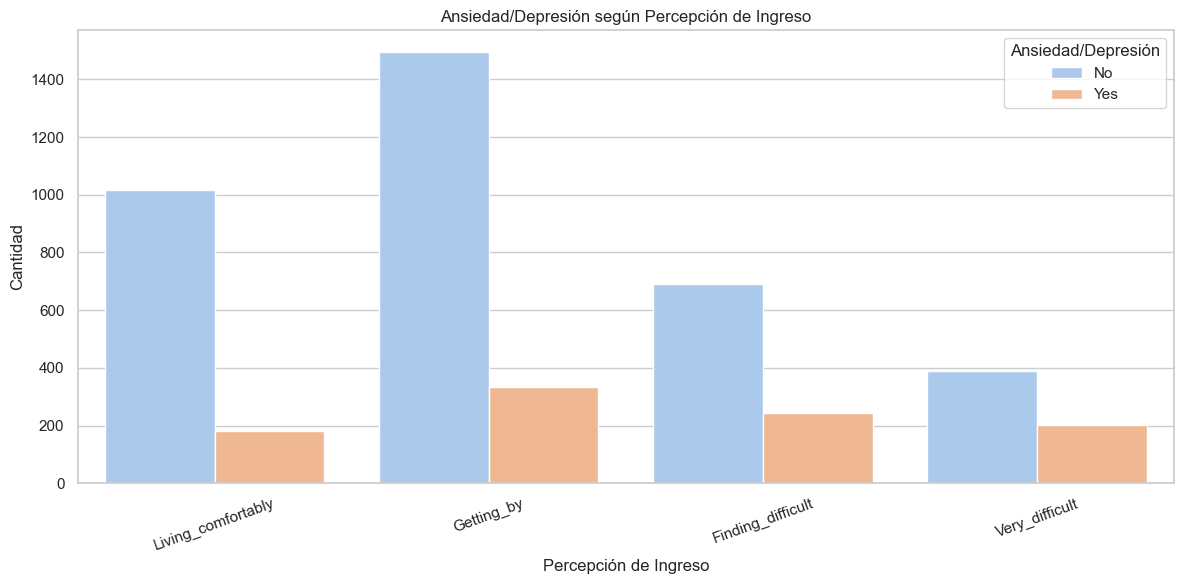


Resultados de la Prueba Chi-Cuadrado (Subjective Income):
Estadístico Chi2: 107.8110
Valor p: 1.1885e-21
Grados de libertad: 5

Existe una asociación estadísticamente significativa entre percepción de ingreso y presencia de ansiedad/depresión.


In [28]:
df_income_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_income_analysis,
    x='Subjective_Income',
    hue='MH7A',
    order=[
        'Living_comfortably',
        'Getting_by',
        'Finding_difficult',
        'Very_difficult'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Percepción de Ingreso")
plt.xlabel("Percepción de Ingreso")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

contingency_table_income = pd.crosstab(df_income_analysis['Subjective_Income'], df_income_analysis['MH7A'])

chi2_income, p_value_income, dof_income, expected_income = chi2_contingency(contingency_table_income)

print("\nResultados de la Prueba Chi-Cuadrado (Subjective Income):")
print(f"Estadístico Chi2: {chi2_income:.4f}")
print(f"Valor p: {p_value_income:.4e}")
print(f"Grados de libertad: {dof_income}")

if p_value_income < 0.05:
    print("\nExiste una asociación estadísticamente significativa entre percepción de ingreso y presencia de ansiedad/depresión.")
else:
    print("\nNo se encontró asociación estadísticamente significativa entre percepción de ingreso y ansiedad/depresión.")

Hice una agrupacion por region

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\2916453418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_analysis['Global11Regions'] = df_region_analysis['Global11Regions'].map(region_mapping)


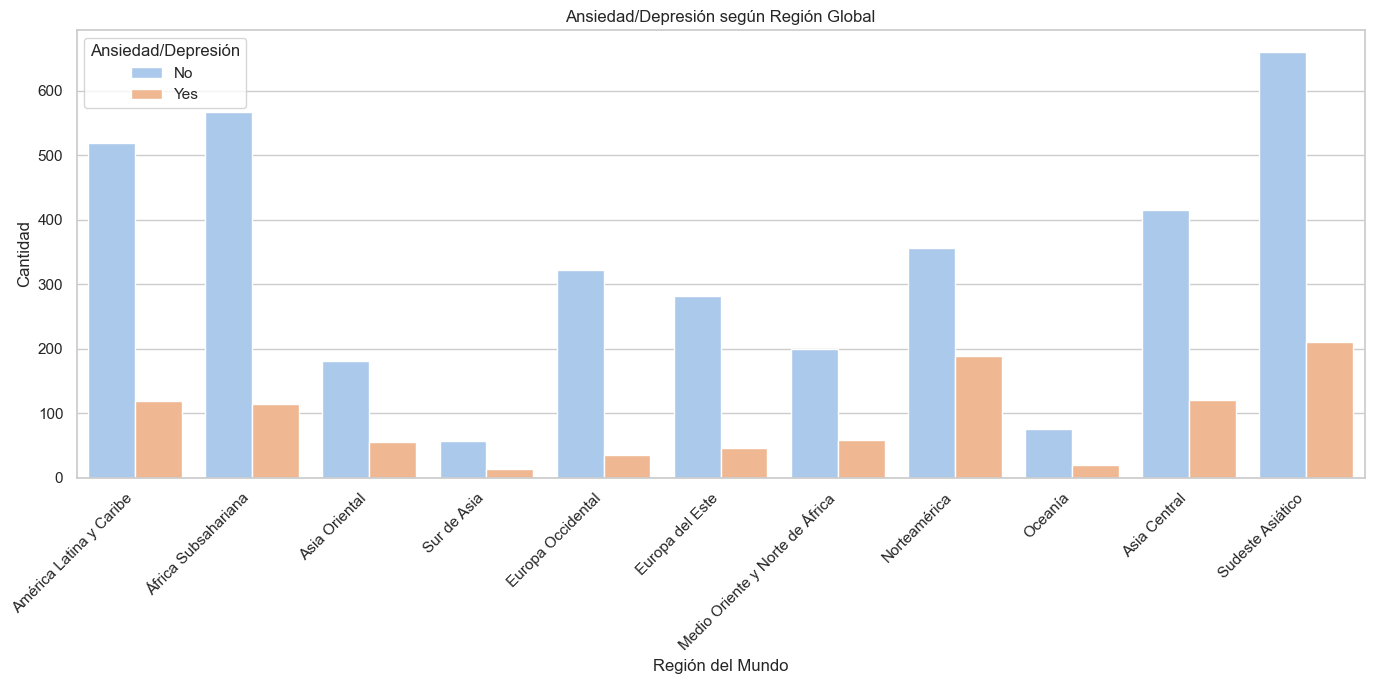


Resultados de la Prueba Chi-Cuadrado (Global11Regions):
Estadístico Chi2: 113.0095
Valor p: 1.3174e-19
Grados de libertad: 10

Existe una asociación estadísticamente significativa entre la región del mundo y la presencia de ansiedad/depresión.


In [34]:

df_region_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

region_mapping = {
    1: 'América Latina y Caribe',
    2: 'África Subsahariana',
    3: 'Asia Oriental',
    4: 'Sur de Asia',
    5: 'Europa Occidental',
    6: 'Europa del Este',
    7: 'Medio Oriente y Norte de África',
    8: 'Norteamérica',
    9: 'Oceanía',
    10: 'Asia Central',
    11: 'Sudeste Asiático'
}

df_region_analysis['Global11Regions'] = df_region_analysis['Global11Regions'].map(region_mapping)

plt.figure(figsize=(14, 7))
sns.countplot(
    data=df_region_analysis,
    x='Global11Regions',
    hue='MH7A',
    order=[
        'América Latina y Caribe',
        'África Subsahariana',
        'Asia Oriental',
        'Sur de Asia',
        'Europa Occidental',
        'Europa del Este',
        'Medio Oriente y Norte de África',
        'Norteamérica',
        'Oceanía',
        'Asia Central',
        'Sudeste Asiático'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Región Global")
plt.xlabel("Región del Mundo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()


contingency_table_region = pd.crosstab(df_region_analysis['Global11Regions'], df_region_analysis['MH7A'])

chi2_region, p_value_region, dof_region, expected_region = chi2_contingency(contingency_table_region)

print("\nResultados de la Prueba Chi-Cuadrado (Global11Regions):")
print(f"Estadístico Chi2: {chi2_region:.4f}")
print(f"Valor p: {p_value_region:.4e}")
print(f"Grados de libertad: {dof_region}")

if p_value_region < 0.05:
    print("\nExiste una asociación estadísticamente significativa entre la región del mundo y la presencia de ansiedad/depresión.")
else:
    print("\nNo se encontró asociación estadísticamente significativa entre región del mundo y ansiedad/depresión.")

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\1296811949.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Asia Central' 'Europa Occidental' 'África Subsahariana' ...
 'Europa Occidental' 'África Subsahariana' 'Asia Oriental']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_region_map.loc[:, 'Global11Regions'] = df_region_map['Global11Regions'].map(region_mapping)


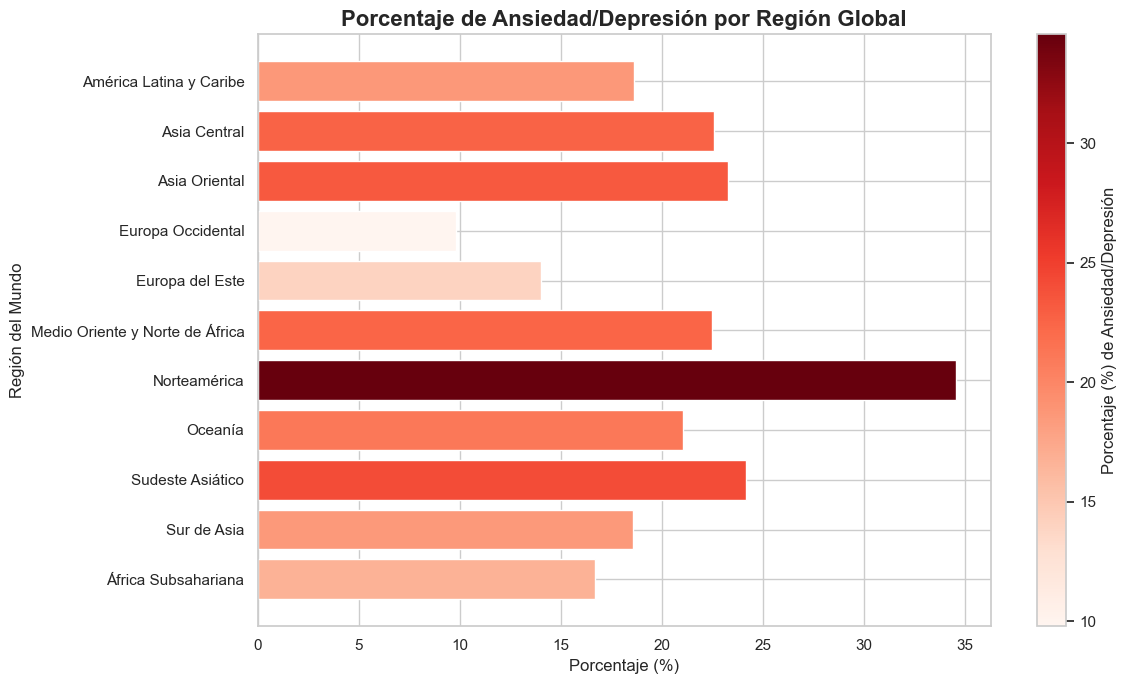

In [38]:
import matplotlib.colors as mcolors

df_region_map = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# Mapeo seguro con .loc para evitar warnings
region_mapping = {
    1: 'América Latina y Caribe',
    2: 'África Subsahariana',
    3: 'Asia Oriental',
    4: 'Sur de Asia',
    5: 'Europa Occidental',
    6: 'Europa del Este',
    7: 'Medio Oriente y Norte de África',
    8: 'Norteamérica',
    9: 'Oceanía',
    10: 'Asia Central',
    11: 'Sudeste Asiático'
}
df_region_map.loc[:, 'Global11Regions'] = df_region_map['Global11Regions'].map(region_mapping)

# Agrupar para calcular porcentaje de ansiedad/depresión
region_summary = (
    df_region_map.groupby('Global11Regions')['MH7A']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

region_yes = region_summary[region_summary['MH7A'] == 'Yes']

# --- 2. Normalizar porcentaje para colores ---
norm = plt.Normalize(region_yes['percentage'].min(), region_yes['percentage'].max())
colors = [plt.cm.Reds(norm(p)) for p in region_yes['percentage']]

# --- 3. Crear figura y eje manualmente ---
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico manualmente para poder controlar el eje
bars = ax.barh(
    region_yes['Global11Regions'],
    region_yes['percentage'],
    color=colors
)

# Crear y agregar la barra de colores
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])  # Obligatorio para matplotlib>=3.1
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Porcentaje (%) de Ansiedad/Depresión', fontsize=12)

# Ajustes de la gráfica
ax.set_title("Porcentaje de Ansiedad/Depresión por Región Global", fontsize=16, fontweight='bold')
ax.set_xlabel("Porcentaje (%)")
ax.set_ylabel("Región del Mundo")
ax.invert_yaxis()  # Para que la región con más porcentaje quede arriba
plt.tight_layout()
plt.show()

Implementacion del modelo

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\314432372.py:8: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


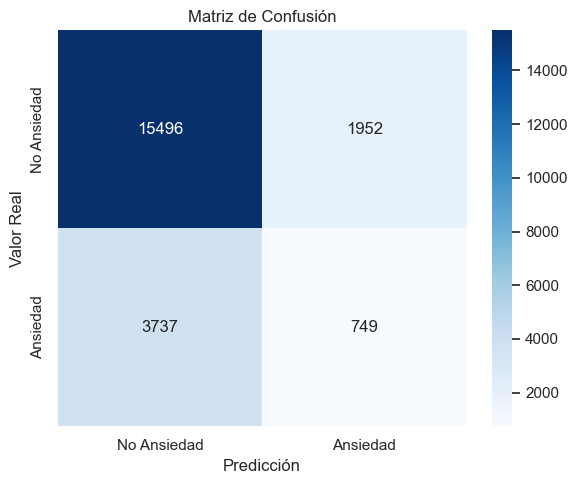


Reporte de Clasificación:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.89      0.84     17448
    Ansiedad       0.28      0.17      0.21      4486

    accuracy                           0.74     21934
   macro avg       0.54      0.53      0.53     21934
weighted avg       0.70      0.74      0.71     21934



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = "wgm_full_wave2_public_file_final.csv"  
df = pd.read_csv(file_path)

df_clean = df.copy()

df_clean = map_variables(df_clean)

df_model = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])].copy()

df_model['target'] = df_model['MH7A'].map({'Yes': 1, 'No': 0})

features = ['Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income', 'EMP_2010', 'Global11Regions']

df_model = df_model[features + ['target']]

le = LabelEncoder()
for col in ['Gender', 'Education', 'Household_Income', 'Subjective_Income', 'EMP_2010', 'Global11Regions']:
    df_model[col] = le.fit_transform(df_model[col])

X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Ansiedad', 'Ansiedad'], 
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))

se cambia el threshold como ajuste y vemos que mejora el recall, pero la precision del modelo  sigue siendo baja

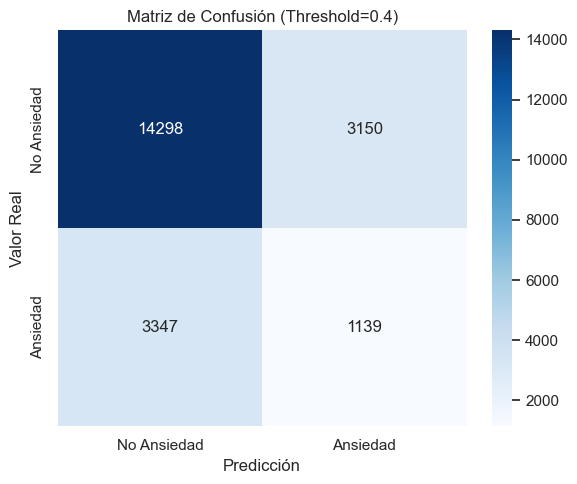


Reporte de Clasificación (Threshold Ajustado):
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.82      0.81     17448
    Ansiedad       0.27      0.25      0.26      4486

    accuracy                           0.70     21934
   macro avg       0.54      0.54      0.54     21934
weighted avg       0.70      0.70      0.70     21934



In [47]:
y_probs = model.predict_proba(X_test)[:, 1]  

threshold = 0.4 

y_pred_adjusted = (y_probs >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación (Threshold Ajustado):")
print(classification_report(y_test, y_pred_adjusted, target_names=['No Ansiedad', 'Ansiedad']))

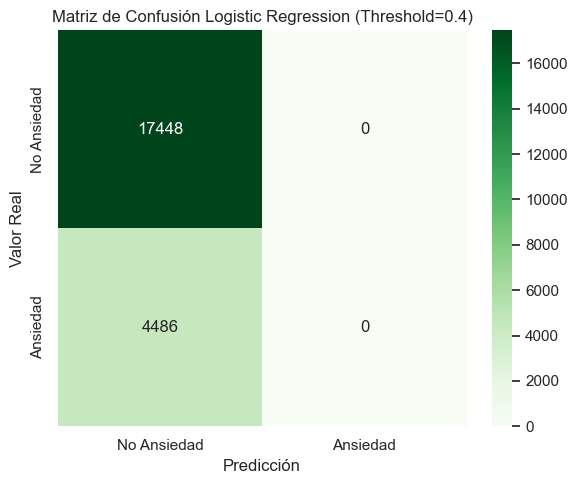


Reporte de Clasificación Logistic Regression:
              precision    recall  f1-score   support

 No Ansiedad       0.80      1.00      0.89     17448
    Ansiedad       0.00      0.00      0.00      4486

    accuracy                           0.80     21934
   macro avg       0.40      0.50      0.44     21934
weighted avg       0.63      0.80      0.70     21934



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abiel\AppData\Roaming\Python\Py

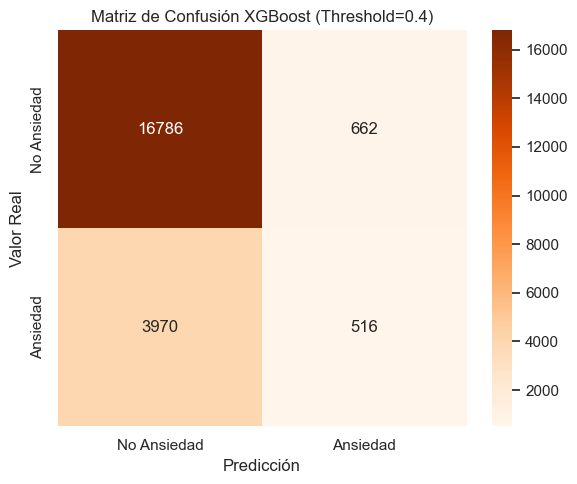


Reporte de Clasificación XGBoost:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.96      0.88     17448
    Ansiedad       0.44      0.12      0.18      4486

    accuracy                           0.79     21934
   macro avg       0.62      0.54      0.53     21934
weighted avg       0.73      0.79      0.74     21934



In [49]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

y_probs_log = log_model.predict_proba(X_test)[:, 1]

threshold = 0.4  # Puedes experimentar con 0.35 también
y_pred_log = (y_probs_log >= threshold).astype(int)

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión Logistic Regression (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=['No Ansiedad', 'Ansiedad']))



# --- 2. XGBoost Classifier ---

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

y_pred_xgb = (y_probs_xgb >= threshold).astype(int)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión XGBoost (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Ansiedad', 'Ansiedad']))


malos resultados para ambos modelos precision baja y un recall muy malo para clases poco balanceadas

Modelos no lineales como Random Forest y XGBoost presentan mejor capacidad para identificar casos de ansiedad o depresión en contextos de clases desbalanceadas, mientras que modelos lineales como Logistic Regression fallan completamente en la detección de la clase minoritaria.

Agrego SMOTE que nos ayudara a balancear el dataset 

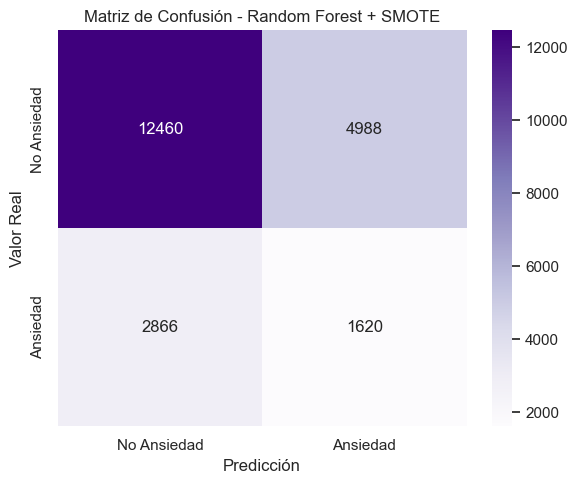


Reporte de Clasificación - Random Forest con SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.71      0.76     17448
    Ansiedad       0.25      0.36      0.29      4486

    accuracy                           0.64     21934
   macro avg       0.53      0.54      0.53     21934
weighted avg       0.70      0.64      0.66     21934



In [56]:
from imblearn.over_sampling import SMOTE

X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42, n_estimators=100)
model_smote.fit(X_train_balanced, y_train_balanced)

y_pred_smote = model_smote.predict(X_test)

cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - Random Forest + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación - Random Forest con SMOTE:")
print(classification_report(y_test, y_pred_smote, target_names=['No Ansiedad', 'Ansiedad']))

C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


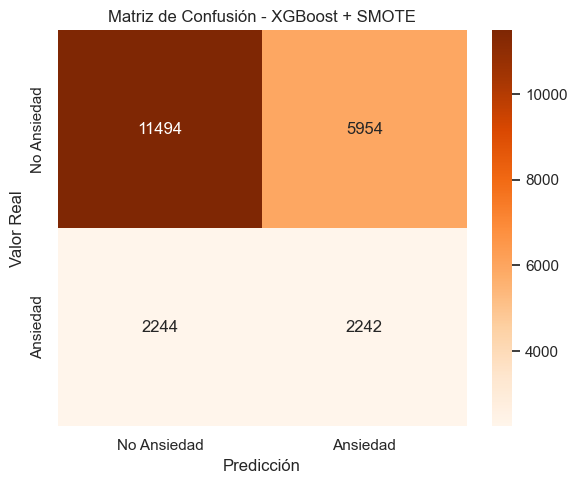


Reporte de Clasificación - XGBoost con SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.84      0.66      0.74     17448
    Ansiedad       0.27      0.50      0.35      4486

    accuracy                           0.63     21934
   macro avg       0.56      0.58      0.55     21934
weighted avg       0.72      0.63      0.66     21934



In [57]:

X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_smote.fit(X_train_balanced, y_train_balanced)

y_pred_xgb_smote = xgb_model_smote.predict(X_test)

cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_smote, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación - XGBoost con SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=['No Ansiedad', 'Ansiedad']))

C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:44:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


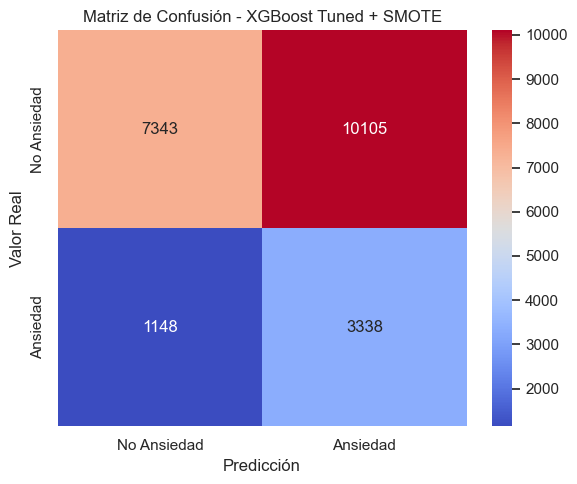


Reporte de Clasificación - XGBoost Tuned + SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.86      0.42      0.57     17448
    Ansiedad       0.25      0.74      0.37      4486

    accuracy                           0.49     21934
   macro avg       0.56      0.58      0.47     21934
weighted avg       0.74      0.49      0.53     21934



In [83]:

X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


xgb_tuned = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,          
    learning_rate=0.1,    
    n_estimators=300,     
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]) 
)

xgb_tuned.fit(X_train_balanced, y_train_balanced)

y_probs_xgb_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

y_pred_xgb_tuned = (y_probs_xgb_tuned >= threshold).astype(int)


cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost Tuned + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación - XGBoost Tuned + SMOTE:")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['No Ansiedad', 'Ansiedad']))

Distribución de clases después de SMOTE: Counter({0: 69747, 1: 69747})

Distribución de clases con pandas:
target
0    69747
1    69747
Name: count, dtype: int64


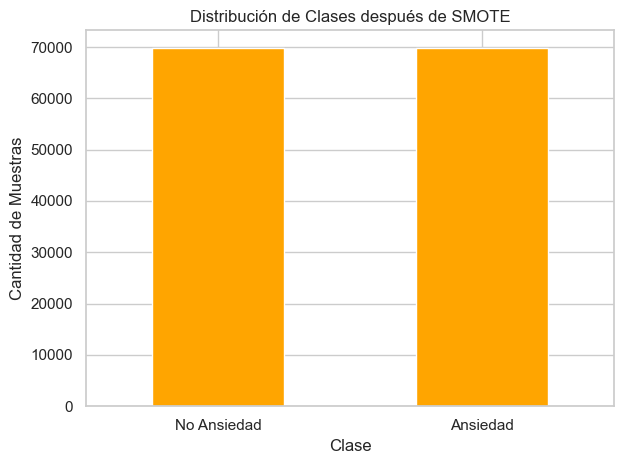

In [87]:

# Verificar el balance de clases después de aplicar SMOTE
from collections import Counter

# Método 1: usando Counter
print("Distribución de clases después de SMOTE:", Counter(y_train_balanced))

# Método 2: usando pandas (más bonito)
print("\nDistribución de clases con pandas:")
print(pd.Series(y_train_balanced).value_counts())


pd.Series(y_train_balanced).value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de Clases después de SMOTE')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Muestras')
plt.xticks(ticks=[0, 1], labels=['No Ansiedad', 'Ansiedad'], rotation=0)
plt.tight_layout()
plt.show()


efectivamente el smote hizo su trabajo

intente con otras variables pero no significo nada extra

C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\1462323625.py:1: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')
C:\Users\abiel\AppData\Local\Temp\ipykernel_12524\1462323625.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_ampliado['target'] = df_model_ampliado['MH7A'].map(mh7a_mapping)
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:45:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, itera

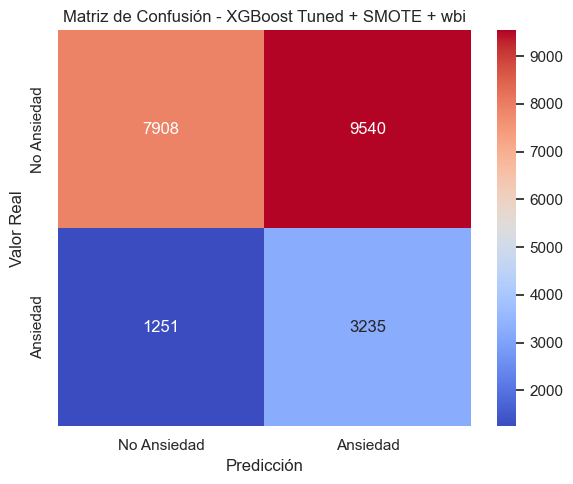


Reporte de Clasificación - XGBoost Tuned + SMOTE + wbi:
              precision    recall  f1-score   support

 No Ansiedad       0.86      0.45      0.59     17448
    Ansiedad       0.25      0.72      0.37      4486

    accuracy                           0.51     21934
   macro avg       0.56      0.59      0.48     21934
weighted avg       0.74      0.51      0.55     21934



In [91]:

df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')

df_clean = map_variables(df_clean)

df_clean = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

features_ampliadas = [
    'Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income',
    'EMP_2010', 'Global11Regions', 'wbi'
]

df_model_ampliado = df_clean[features_ampliadas + ['MH7A']]

mh7a_mapping = {'Yes': 1, 'No': 0}
df_model_ampliado['target'] = df_model_ampliado['MH7A'].map(mh7a_mapping)
df_model_ampliado = df_model_ampliado.drop(columns=['MH7A'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Education', 'Household_Income', 'Subjective_Income',
            'EMP_2010', 'Global11Regions', 'wbi']:
    df_model_ampliado[col] = le.fit_transform(df_model_ampliado[col])

from sklearn.model_selection import train_test_split
X = df_model_ampliado.drop(columns='target')
y = df_model_ampliado['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from xgboost import XGBClassifier

xgb_tuned_ampliado = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=300,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])
)

xgb_tuned_ampliado.fit(X_train_balanced, y_train_balanced)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_probs = xgb_tuned_ampliado.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_probs >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost Tuned + SMOTE + wbi')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación - XGBoost Tuned + SMOTE + wbi:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))


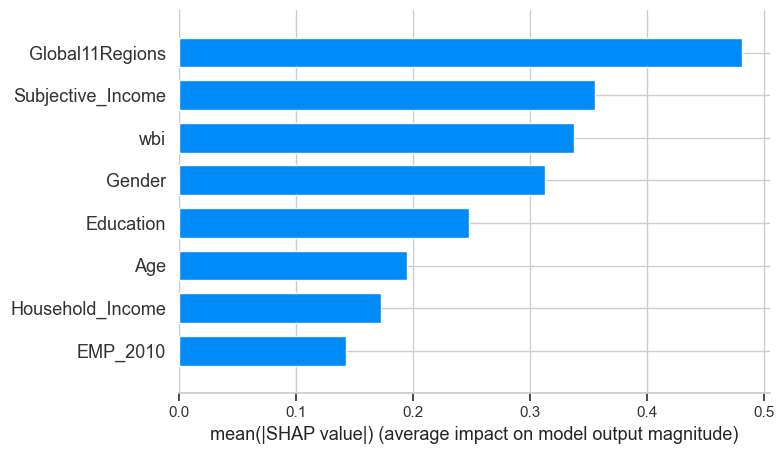


Predicción para muestra individual:
Age                  20
Gender                1
Education             1
Household_Income      1
Subjective_Income     2
EMP_2010              1
Global11Regions       5
wbi                   1
Name: 50583, dtype: int64


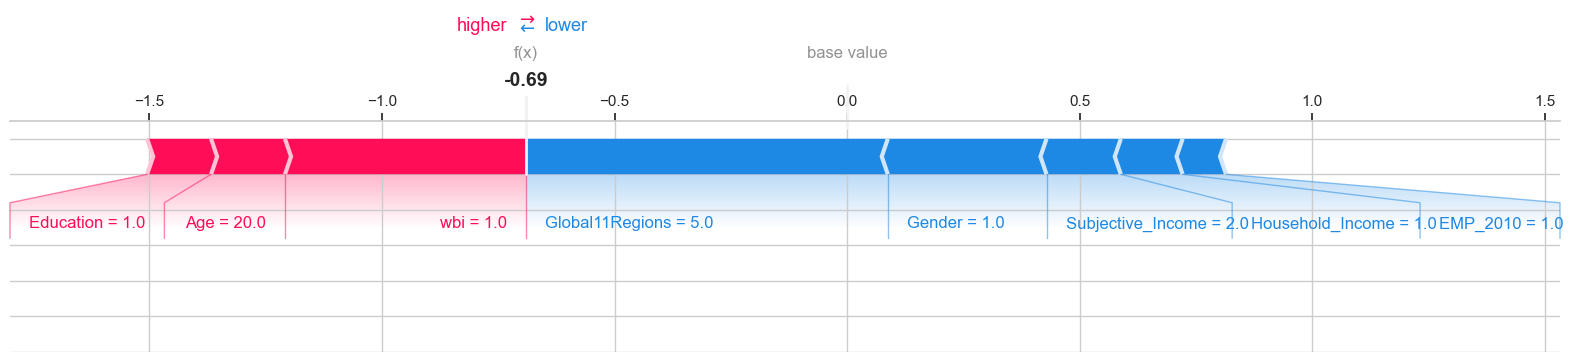

In [92]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgb_tuned_ampliado)

shap_values = explainer.shap_values(X_test)

plt.title('Importancia Global de Variables (SHAP)')
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

sample_index = 0 

print("\nPredicción para muestra individual:")
print(X_test.iloc[sample_index])

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index, :],
    X_test.iloc[sample_index, :],
    matplotlib=True
)

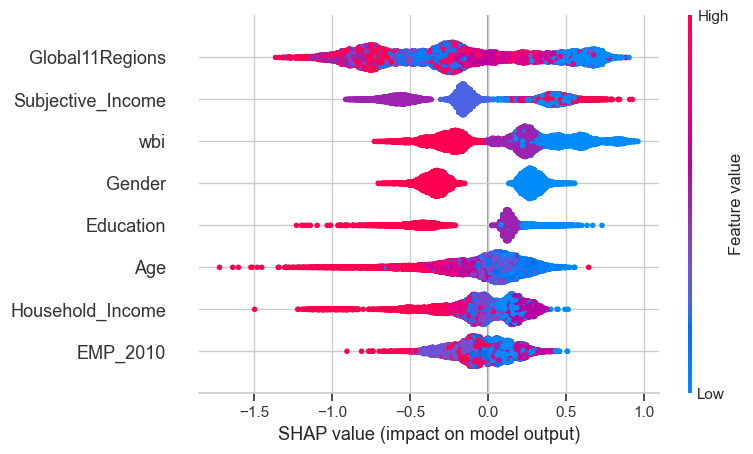

In [96]:
shap.summary_plot(shap_values, X_test, plot_type="dot")

In [98]:
import lime
import lime.lime_tabular
import numpy as np

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_balanced),
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Ansiedad', 'Ansiedad'],
    mode='classification'
)

sample_index = 0  
sample = X_test.iloc[sample_index]

exp = explainer_lime.explain_instance(
    data_row=sample,
    predict_fn=xgb_tuned_ampliado.predict_proba
)

exp.show_in_notebook(show_table=True)

print(exp.as_list())


C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

[('wbi <= 1.00', 0.25361388637931864), ('Education <= 1.00', 0.13714154907853482), ('0.00 < Gender <= 1.00', -0.09188459854104143), ('1.00 < Global11Regions <= 6.00', -0.08626716060057488), ('Subjective_Income <= 2.00', 0.0826274922764725), ('Age <= 25.00', 0.031037789016068355), ('Household_Income <= 1.00', 0.025615071583631507), ('0.00 < EMP_2010 <= 2.00', -0.014960006965488819)]
